In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

from api_keys import weather_api_key
from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
weather_info = pd.DataFrame({"Cities":cities})
weather_info

,Cities
0,punta arenas
1,harlingen
2,thompson
3,busselton
4,kapaa
...,...
623,loiza
624,cerea
625,riyadh
626,brokopondo


In [4]:
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind = []
city_num = 0
city_num_list = []
city_used = []

for city in weather_info['Cities']:
    response = requests.get(query_url + city).json()
    
    time.sleep(1)
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_used.append(city)
        city_num = city_num + 1
        print(city_num, city)
        city_num_list.append(city_num)
    except KeyError:
        print('City Not Found')

1 punta arenas
2 harlingen
3 thompson
4 busselton
5 kapaa
6 hamilton
City Not Found
7 cheyenne
8 ahipara
9 bredasdorp
10 sitka
11 grindavik
12 comodoro rivadavia
13 vaini
14 tayu
15 harper
16 portland
17 isangel
18 henties bay
City Not Found
19 sao filipe
20 cherskiy
21 souillac
22 avarua
23 port alfred
24 east london
25 dundalk
26 hobart
27 hermanus
28 minsk
29 rikitea
30 kimbe
City Not Found
City Not Found
31 puquio
32 mataura
33 nanortalik
34 coihaique
35 los llanos de aridane
36 geraldton
37 hofn
City Not Found
38 georgetown
39 ushuaia
40 boca do acre
41 cape town
42 bengkulu
43 butaritari
44 arraial do cabo
45 soyo
46 betioky
47 svetlyy
48 haines junction
49 bethel
50 cooma
51 port elizabeth
52 gweta
53 tuktoyaktuk
54 ust-tsilma
55 ponta do sol
City Not Found
56 mar del plata
57 bergen
58 garmsar
59 praia da vitoria
60 sangar
61 hue
62 hilo
63 shache
64 zhigansk
65 paita
66 nome
67 albany
68 egvekinot
69 chokurdakh
70 new norfolk
71 pevek
72 hobyo
73 norman wells
74 leningradskiy


In [5]:
weather_df = pd.DataFrame({'City':city_used, 'Latitude':lat, 'Longitude':lng, 'Temperature (F)':temp, 'Max Temperature (F)': max_temp,
                           'Humidity (%)':humidity, 'Cloudiness (%)':cloudiness, 'Wind Speed (MPH)':wind})
weather_df

,City,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,punta arenas,-53.15,-70.92,68.00,68.00,49,40,12.75
1,harlingen,26.19,-97.70,77.68,82.40,78,90,21.92
2,thompson,55.74,-97.86,5.00,5.00,77,75,2.24
3,busselton,-33.65,115.33,60.62,66.00,34,0,14.09
4,kapaa,22.08,-159.32,73.96,75.20,50,20,11.41
...,...,...,...,...,...,...,...,...
573,loiza,18.43,-65.88,76.46,80.60,65,40,16.11
574,cerea,45.19,11.21,44.10,46.99,87,75,2.24
575,riyadh,24.69,46.72,53.60,53.60,39,45,4.70
576,brokopondo,4.75,-55.17,75.63,75.63,72,52,7.43


In [21]:
output_file = "cities.csv"
weather_df.to_csv(output_file, encoding="utf-8", index_label="City_ID")

In [22]:
weather_df = pd.read_csv(output_file)

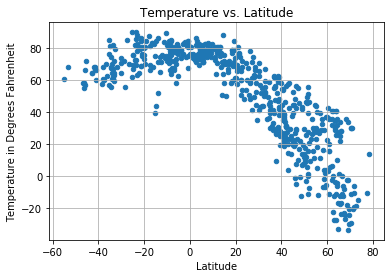

In [38]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Temperature (F)', marker = 'o')
plt.title('Temperature vs. Latitude')
plt.ylabel('Temperature in Degrees Fahrenheit')
plt.grid()
plt.savefig("Chart 1")

There seems to be negative correlation between latitude and temperature. As the latitude goes up, temperature comes down. This makes total sense because as you go north, temperature tends to come down.

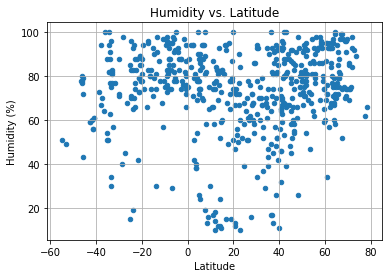

In [39]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Humidity (%)', marker = 'o')
plt.title('Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Chart 2")

There seems to be no correlation between humidity and latitude. If you look closely, we could draw a slight positive correlation but it's definitely not strong enough to make any conclusions. 

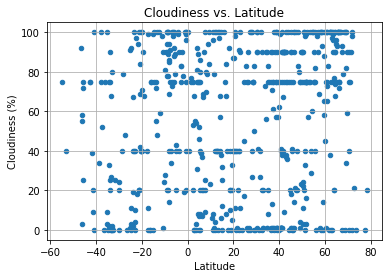

In [40]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness (%)', marker = 'o')
plt.title('Cloudiness vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Chart 3")

There is absolutely no sign of correlation between latitude and cloudiness. If you think about it, this makes sense. I feel like cloudiness is one of those weather conditions where there are too many external factors that play into it. 

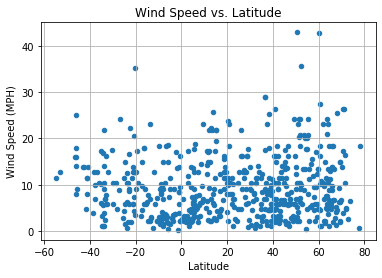

In [41]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed (MPH)', marker = 'o')
plt.title('Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()
plt.savefig("Chart 4")

Wind speed is different from cloudiness that it's pretty consistent across both sides of the equator. I see a very small negative correlation but I can't draw decisive conclusions between the two metrics. 

In [26]:
def north_regression(y_variable):
    x_values = north_weather['Latitude']
    y_values = north_weather[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    north_weather.plot(kind = 'scatter', x = 'Latitude', y = y_variable, marker = 'o')
    plt.title(y_variable +' vs. Latitude')
    plt.ylabel(y_variable)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid()
    plt.plot(x_values, regress_values,"r-")
    print(f"R-value equals {str(rvalue)}")
    print(line_eq)
    
def south_regression(y_variable):
    x_values = south_weather['Latitude']
    y_values = south_weather[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    south_weather.plot(kind = 'scatter', x = 'Latitude', y = y_variable, marker = 'o')
    plt.title(y_variable +' vs. Latitude')
    plt.ylabel(y_variable)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid()
    plt.plot(x_values, regress_values,"r-")
    print(f"R-value equals {str(rvalue)}")
    print(line_eq)

In [27]:
# Create Northern and Southern Hemisphere DataFrames
north_weather = weather_df.loc[weather_df['Latitude']>0]
south_weather = weather_df.loc[weather_df['Latitude']<0]

R-value equals -0.8646360283352221
y = -1.26x + 88.41


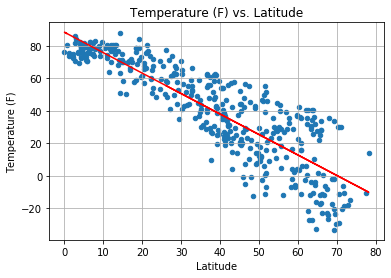

In [42]:
north_regression('Temperature (F)')
plt.savefig("Chart 5")

R-value equals 0.4692179156802238
y = 0.32x + 79.31


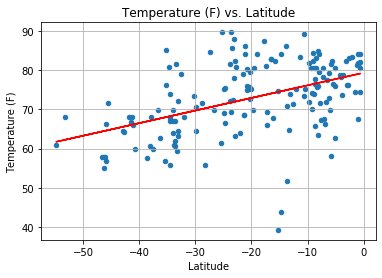

In [43]:
south_regression('Temperature (F)')
plt.savefig("Chart 6")

R-value equals 0.26526838310193196
y = 0.27x + 61.64


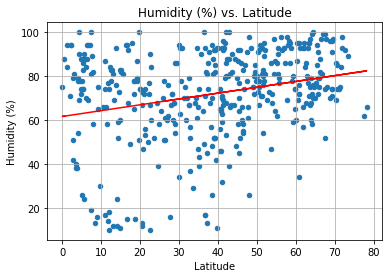

In [44]:
north_regression('Humidity (%)')
plt.savefig("Chart 7")

R-value equals 0.3569001345755654
y = 0.43x + 86.11


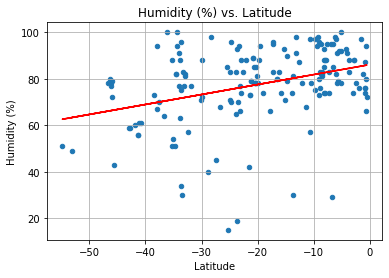

In [45]:
south_regression('Humidity (%)')
plt.savefig("Chart 8")

R-value equals 0.21669423759029324
y = 0.4x + 40.16


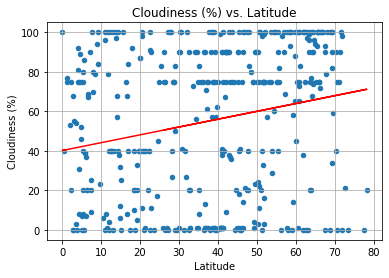

In [46]:
north_regression('Cloudiness (%)')
plt.savefig("Chart 9")

R-value equals 0.35652818219123994
y = 0.95x + 74.62


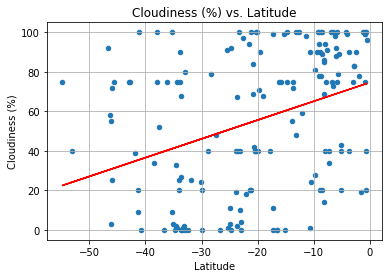

In [47]:
south_regression('Cloudiness (%)')
plt.savefig("Chart 10")

R-value equals 0.10655141782422539
y = 0.04x + 8.26


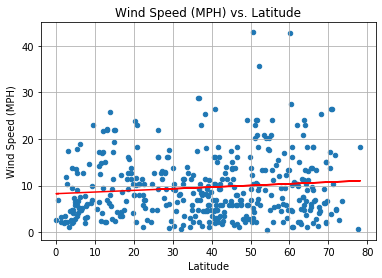

In [48]:
north_regression('Wind Speed (MPH)')
plt.savefig("Chart 11")

R-value equals -0.28426644021296044
y = -0.13x + 6.08


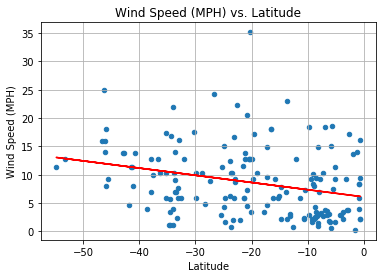

In [49]:
south_regression('Wind Speed (MPH)')
plt.savefig("Chart 12")